# Sentiment Analysis on TikTok Reviews using Python Programming

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("tiktok_google_play_reviews.csv")
print(data.head())

                                            reviewId        userName  \
0  gp:AOqpTOHRz-11c0apHLSKHHp52FxUXsQS9Z88wP3sWc5...    MR LOL GAMER   
1  gp:AOqpTOF6mFDEkIypmyT3shDLjPHg8zB3kdns2W36ahp...     Dino Kljako   
2  gp:AOqpTOGtqU4sb8vuVo3-eB7kIXWoBn-0YCUZ1SnPRKS...  Olivia Harding   
3  gp:AOqpTOFHDm-Qa5R6jCpOGTFT2qr1_PKbCTbBNPahCEn...         Keli We   
4  gp:AOqpTOFB6Ndao8IHRpOJRmbSknwMGxHcwYzux93YyXI...    Mavis Kotoka   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AATXAJ...   
1  https://play-lh.googleusercontent.com/a-/AOh14...   
2  https://play-lh.googleusercontent.com/a/AATXAJ...   
3  https://play-lh.googleusercontent.com/a-/AOh14...   
4  https://play-lh.googleusercontent.com/a/AATXAJ...   

                                             content  score  thumbsUpCount  \
0                                               Good      5              0   
1  Awesome app! Too many people on it where it's ...      5              0

In [3]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHRz-11c0apHLSKHHp52FxUXsQS9Z88wP3sWc5...,MR LOL GAMER,https://play-lh.googleusercontent.com/a/AATXAJ...,Good,5,0,23.8.4,2022-04-05 23:18:30,NaN,NaN
1,gp:AOqpTOF6mFDEkIypmyT3shDLjPHg8zB3kdns2W36ahp...,Dino Kljako,https://play-lh.googleusercontent.com/a-/AOh14...,Awesome app! Too many people on it where it's ...,5,0,NaN,2022-04-05 23:18:21,NaN,NaN
2,gp:AOqpTOGtqU4sb8vuVo3-eB7kIXWoBn-0YCUZ1SnPRKS...,Olivia Harding,https://play-lh.googleusercontent.com/a/AATXAJ...,Not bad,5,0,23.9.5,2022-04-05 23:17:34,NaN,NaN
3,gp:AOqpTOFHDm-Qa5R6jCpOGTFT2qr1_PKbCTbBNPahCEn...,Keli We,https://play-lh.googleusercontent.com/a-/AOh14...,It is good,2,0,22.2.5,2022-04-05 23:17:04,NaN,NaN
4,gp:AOqpTOFB6Ndao8IHRpOJRmbSknwMGxHcwYzux93YyXI...,Mavis Kotoka,https://play-lh.googleusercontent.com/a/AATXAJ...,Very interesting app,5,0,22.1.5,2022-04-05 23:17:04,NaN,NaN


In [4]:
print(data.shape)

(307057, 10)


In [5]:
print(data.isnull().sum())

reviewId                     0
userName                     0
userImage                    0
content                      4
score                        0
thumbsUpCount                0
reviewCreatedVersion     89216
at                           0
replyContent            306938
repliedAt               306938
dtype: int64


In [6]:
data = data[["userName","content", "score","thumbsUpCount"]]

In [7]:
data.head()

,userName,content,score,thumbsUpCount
0,MR LOL GAMER,Good,5,0
1,Dino Kljako,Awesome app! Too many people on it where it's ...,5,0
2,Olivia Harding,Not bad,5,0
3,Keli We,It is good,2,0
4,Mavis Kotoka,Very interesting app,5,0


In [8]:
data.shape

(307057, 4)

In [9]:
data = data.dropna()

In [10]:
data.shape

(307053, 4)

In [11]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

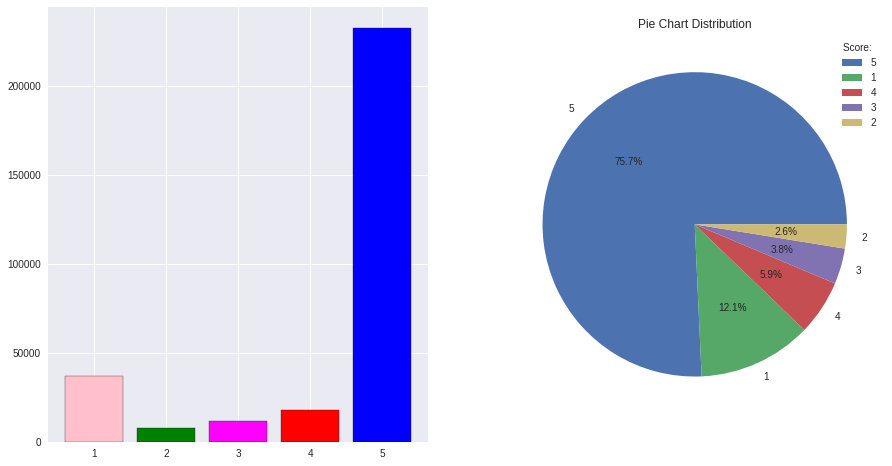

In [12]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values

plt.style.use("seaborn")
plt.figure(figsize=(15,8),facecolor="w")

plt.subplot(1,2,1)
plt.bar(numbers,quantity,edgecolor='black',
        color=["blue","pink","red","magenta","green"])

plt.subplot(1,2,2)
plt.pie(ratings,labels=numbers,autopct='%1.1f%%')
plt.title("Pie Chart Distribution")
plt.legend(title = "Score: ")

plt.show()

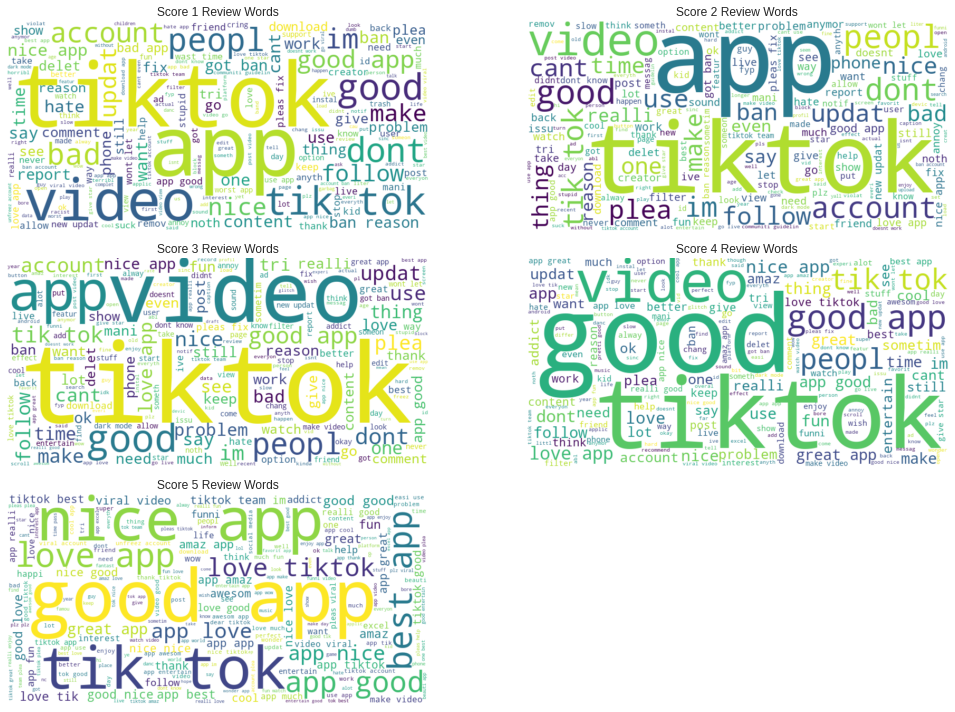

In [13]:
stopwords = set(STOPWORDS)
plt.figure(figsize=(15,10),facecolor="w")

plt.subplot(3,2,1)
score_1 = " ".join(i for i in data[data["score"]==1].content)
wordcloud = WordCloud(stopwords=stopwords,background_color="white",
                      width=800, height=400).generate(score_1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Score 1 Review Words")
plt.axis("off")

plt.subplot(3,2,2)
score_2 = " ".join(i for i in data[data["score"]==2].content)
wordcloud = WordCloud(stopwords=stopwords,background_color="white",
                      width=800, height=400).generate(score_2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Score 2 Review Words")
plt.axis("off")

plt.subplot(3,2,3)
score_3 = " ".join(i for i in data[data["score"]==3].content)
wordcloud = WordCloud(stopwords=stopwords,background_color="white",
                      width=800, height=400).generate(score_3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Score 3 Review Words")
plt.axis("off")

plt.subplot(3,2,4)
score_4 = " ".join(i for i in data[data["score"]==4].content)
wordcloud = WordCloud(stopwords=stopwords,background_color="white",
                      width=800, height=400).generate(score_4)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Score 4 Review Words")
plt.axis("off")

plt.subplot(3,2,5)
score_5 = " ".join(i for i in data[data["score"]==5].content)
wordcloud = WordCloud(stopwords=stopwords,background_color="white",
                      width=800, height=400).generate(score_5)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Score 5 Review Words")
plt.axis("off")

plt.tight_layout()
plt.show()

In [14]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]

print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0                                               good     1.000       0.0   
1  awesom app mani peopl easier fb girl awesom gu...     0.381       0.0   
2                                                bad     0.000       1.0   
3                                               good     1.000       0.0   
4                                       interest app     0.750       0.0   

   Neutral  
0    0.000  
1    0.619  
2    0.000  
3    0.000  
4    0.250  


In [15]:
data.head()

,content,Positive,Negative,Neutral
0,good,1.000,0.0,0.000
1,awesom app mani peopl easier fb girl awesom gu...,0.381,0.0,0.619
2,bad,0.000,1.0,0.000
3,good,1.000,0.0,0.000
4,interest app,0.750,0.0,0.250


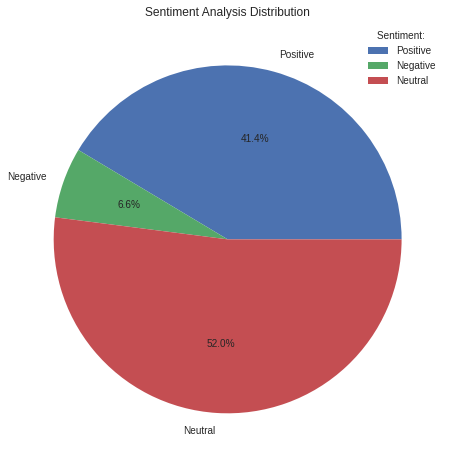

In [16]:
Labels = ["Positive","Negative","Neutral"]
values = [data[data["Positive"]>0].shape[0],
          data[data["Negative"]>0].shape[0],
          data[data["Neutral"]>0].shape[0]]

plt.figure(figsize=(10,8),facecolor="w")
plt.pie(values,labels=Labels,autopct='%1.1f%%')
plt.title("Sentiment Analysis Distribution")
plt.legend(title = "Sentiment: ")
plt.show()